In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
%matplotlib inline
from PIL import Image
import seaborn as sns 
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go
from statsmodels.graphics.gofplots import qqplot 

In [2]:
df = pd.read_csv("DisneylandReviews.csv", encoding = 'ISO-8859-1', na_values = 'missing')
print(df.shape) # (42656, 6)

## check percentages of missing values in each column
df_ = df.isnull().sum() / len(df)*100
print(df_.sort_values(ascending=False))

## drop duplicated reviews bsed on Review_ID
df = df.drop_duplicates(subset='Review_ID').reset_index()
print(df.shape)
df.head()

(42656, 6)
Year_Month           6.12575
Review_ID            0.00000
Rating               0.00000
Reviewer_Location    0.00000
Review_Text          0.00000
Branch               0.00000
dtype: float64
(42636, 7)


,index,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


# 1. Analyses For 3 Disneylands
## (1) Peak Time And Major Visitors Analyses

count    40023.000000
mean      2014.894311
std          2.084247
min       2010.000000
25%       2013.000000
50%       2015.000000
75%       2016.000000
max       2019.000000
Name: Year, dtype: float64


/var/folders/jr/kc3prx_95yx5qzv4qynb3f680000gn/T/ipykernel_9183/1494637754.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


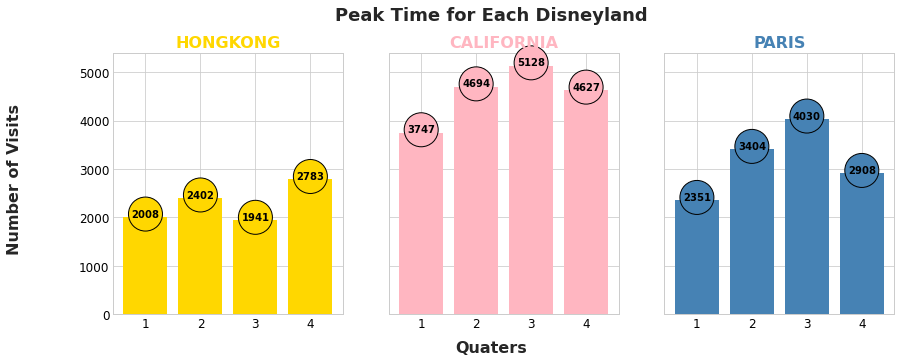

In [3]:
# create Quarter column
df_dropna = df.dropna().reset_index()
df_dropna[['Year', 'Month']] = df_dropna['Year_Month'].str.split("-", expand=True)
df_dropna[['Year', 'Month']] = df_dropna[['Year', 'Month']].astype(int)
df_dropna['Quarter'] = (df_dropna['Month'] - 1) // 3 + 1
print(df_dropna['Year'].describe())

# peak time for each Disneyland
color_list = ['gold', 'lightpink', 'steelblue']
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(1, 3, figsize=(14, 5), sharey=True)
    plt.subplots_adjust(top=0.85)
    # for each branch and color
    for i, (b, c) in enumerate(zip(df_dropna['Branch'].unique(), color_list)):
        # select branch and count by quarter
        quarter_df = df_dropna[(df_dropna['Branch'] == b)]['Quarter'] \
            .value_counts()
        # bar plot
        ax[i].bar(quarter_df.index, quarter_df.values, color=c, label=b)
        # for count by branch and quarter
        for q, val in zip(quarter_df.index, quarter_df.values):
            # text plot
            ax[i].text(
                q, val, val,
                ha='center', 
                color='black',
                fontsize=10,
                fontweight='demi',
                bbox=dict(
                    facecolor=c,
                    edgecolor='black',
                    boxstyle="circle"))
        ax[i].set_title(b.split("_")[1].upper(), color=c, fontweight='demi', fontsize=16)
        ax[i].tick_params(axis='x', labelsize=12, labelcolor='black')
        ax[i].tick_params(axis='y', labelsize=12, labelcolor='black')
    fig.suptitle('Peak Time for Each Disneyland', fontsize=18, fontweight='bold')
    fig.supxlabel('Quaters', fontsize=16, fontweight='demi')
    fig.supylabel('Number of Visits', fontsize=16, fontweight='demi')
    fig.show()

/var/folders/jr/kc3prx_95yx5qzv4qynb3f680000gn/T/ipykernel_9183/3506535511.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


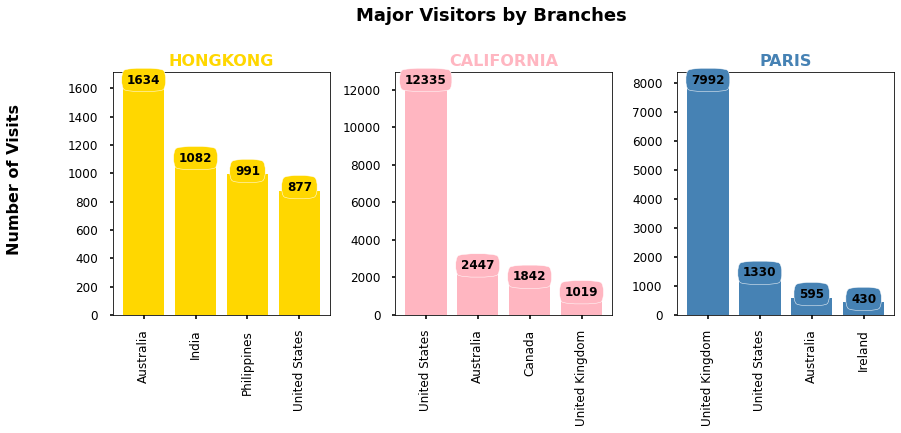

In [4]:
## check major groups by branches
with plt.style.context('seaborn-poster'):
    fig, ax = plt.subplots(1, 3, figsize=(14, 5))
    plt.subplots_adjust(top=0.8, wspace=0.3)
    # for each branch and color
    for i, (b, col) in enumerate(zip(df['Branch'].unique(), color_list)):
        # select branch and count by locations
        location_df = df[df['Branch'] == b]['Reviewer_Location'] \
            .value_counts()[:4]
        # bar plot
        ax[i].bar(location_df.index, location_df.values, color=col)
        ax[i].set_title(b.split("_")[1].upper(), color=col, fontsize=16, fontweight='bold')
        ax[i].tick_params(axis='x', rotation=90, labelsize=12, labelcolor='black')
        ax[i].tick_params(axis='y', labelsize=12, labelcolor='black')
        # for each count by locations
        for c, val in zip(location_df.index, location_df.values):
        # text plot
            ax[i].text(
                c, val, val,
                ha='center',
                color='black',
                fontweight='demi',
                fontsize=12,
                bbox=dict(
                    facecolor=col,
                    edgecolor='white', 
                    boxstyle="round4", # circle, darrow, larrow, rarrow, round, round4, roundtooth, sawtooth, square
                    pad=0.5))
    fig.suptitle('Major Visitors by Branches', fontsize=18, fontweight='bold')
    fig.supylabel('Number of Visits', fontsize=16, fontweight='demi')
    fig.show()

/var/folders/jr/kc3prx_95yx5qzv4qynb3f680000gn/T/ipykernel_9183/838956952.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


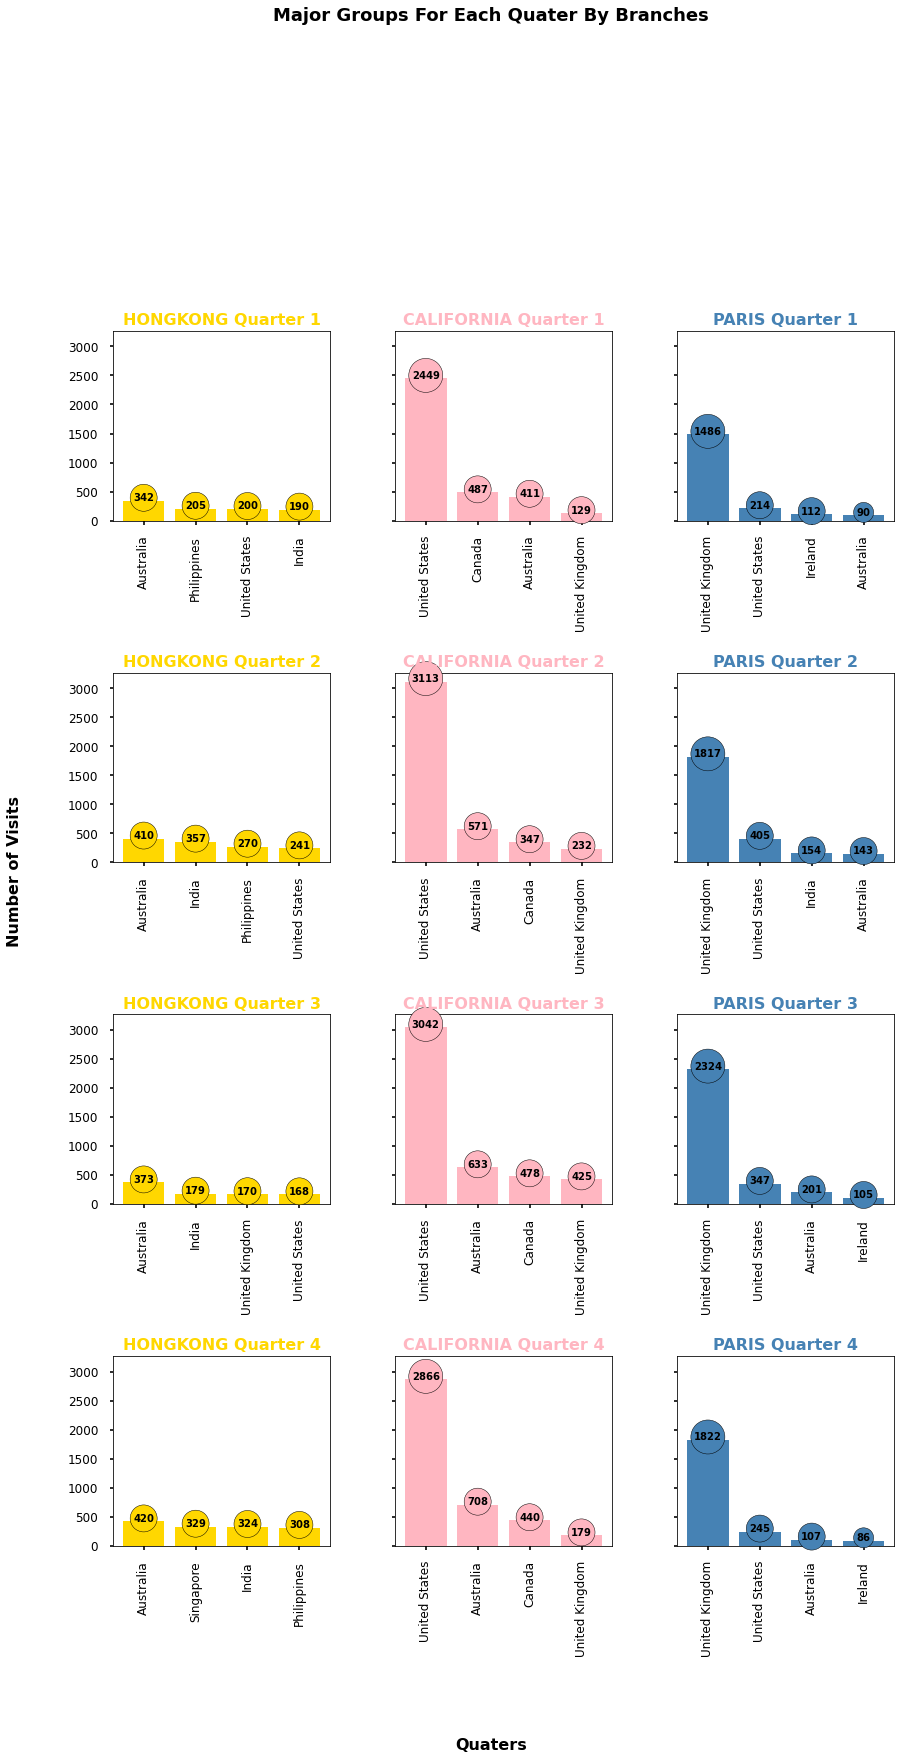

In [5]:
# check major groups for each Disneyland by quarters 
df_dropna.head()
with plt.style.context('seaborn-poster'):
    fig, ax = plt.subplots(4, 3, figsize=(14, 25), sharex=False, sharey=True)
    plt.subplots_adjust(top=0.8, wspace=0.3, hspace=0.8)
    # for each quarter
    for j in df_dropna['Quarter'].sort_values().unique():
        # for each branch and color
        for i, (b, c) in enumerate(zip(df_dropna['Branch'].unique(), color_list)):
            # select specific branch and quarter
            quarter_df = df_dropna.loc[(df_dropna['Branch'] == b)&(df_dropna['Quarter'] == j)] \
                .groupby('Reviewer_Location') \
                .agg({'Rating': 'count'}) \
                .unstack()['Rating'] \
                .sort_values(ascending=False) \
                .head(4)
            # bar plot
            ax[j-1, i].bar(quarter_df.index, quarter_df.values, color=c, label=b)
            # for each count by quarters
            for q, val in zip(quarter_df.index, quarter_df.values):
                # text plot
                ax[j-1, i].text(
                    q, val, val,
                    ha='center', 
                    color='black',
                    fontsize=10,
                    fontweight='demi',
                    bbox=dict(
                        facecolor=c,
                        edgecolor='black',
                        boxstyle="circle"))
                branch_name = b.split("_")[1].upper()
            ax[j-1, i].set_title(f"{branch_name} Quarter {j}", color=c, fontweight='demi', fontsize=16)
            ax[j-1, i].tick_params(axis='x', labelsize=12, labelcolor='black', rotation=90)
            ax[j-1, i].tick_params(axis='y', labelsize=12, labelcolor='black')
        fig.suptitle('Major Groups For Each Quater By Branches', fontsize=18, fontweight='bold')
        fig.supxlabel('Quaters', fontsize=16, fontweight='demi')
        fig.supylabel('Number of Visits', fontsize=16, fontweight='demi')
        fig.show()

## (2) Rating Analyses

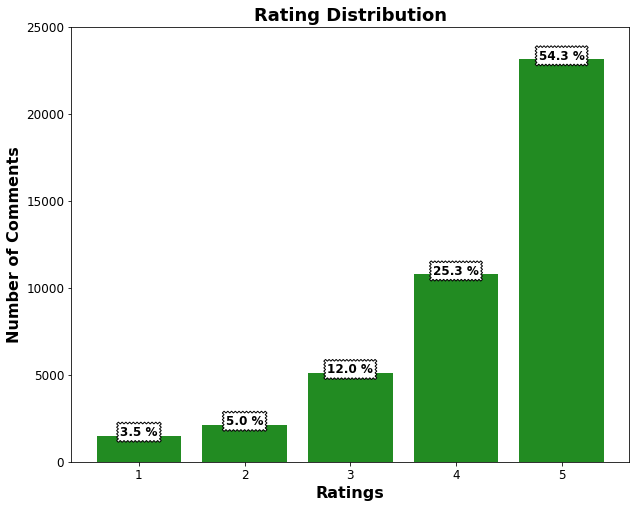

In [7]:
## rating distribution for all Disneylands
# count rating for each rating category
rating_df = df['Rating'].value_counts()
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(10, 8))
    # bar plot
    plt.bar(rating_df.index, rating_df.values, color='forestgreen')
    # for each rating category
    for r, val in zip(rating_df.index, rating_df.values):
        # plot text
        plt.text(
            r, val, 
            f"{round(val / sum(rating_df.values) * 100, 1)} %", 
            ha='center',
            color='black',
            fontweight='demi',
            fontsize=12,
            bbox=dict(
                facecolor='white',
                edgecolor='black',
                boxstyle="sawtooth"))
    plt.title('Rating Distribution', fontsize=18, fontweight='bold')
    plt.xlabel('Ratings', fontsize=16, fontweight='bold')
    plt.ylabel('Number of Comments', fontsize=16, fontweight='bold')
    plt.yticks(np.arange(0, 27000, 5000))
    plt.tick_params(axis='x', labelsize=12, labelcolor='black')
    plt.tick_params(axis='y', labelsize=12, labelcolor='black')

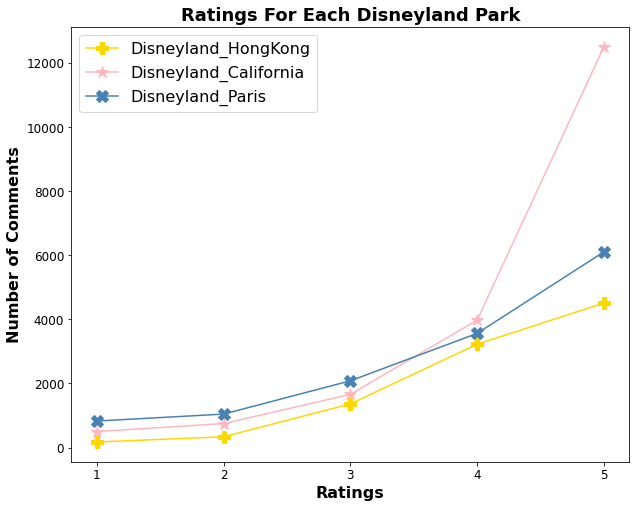

In [8]:
# rating distribution for each Disneyland by rating categories
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(10, 8))
    # for each branch, symbol, and color
    for b, m, c in zip(df['Branch'].unique(), ['P', '*', 'X'], color_list):
        # select branch and count ratings in each category
        rating_df = df[df['Branch'] == b]['Rating'] \
            .value_counts()
        # line plot
        plt.plot(rating_df.index, rating_df.values, marker=m, markersize=12, color=c, label=b)
    plt.title('Ratings For Each Disneyland Park', fontsize=18, fontweight='bold')
    plt.xlabel('Ratings', fontsize=16, fontweight='bold')
    plt.ylabel('Number of Comments', fontsize=16, fontweight='bold')
    plt.legend(fontsize=16, labelcolor='black')
    plt.xticks(np.arange(1, 6))
    plt.tick_params(axis='x', labelsize=12, labelcolor='black')
    plt.tick_params(axis='y', labelsize=12, labelcolor='black')
    plt.show()

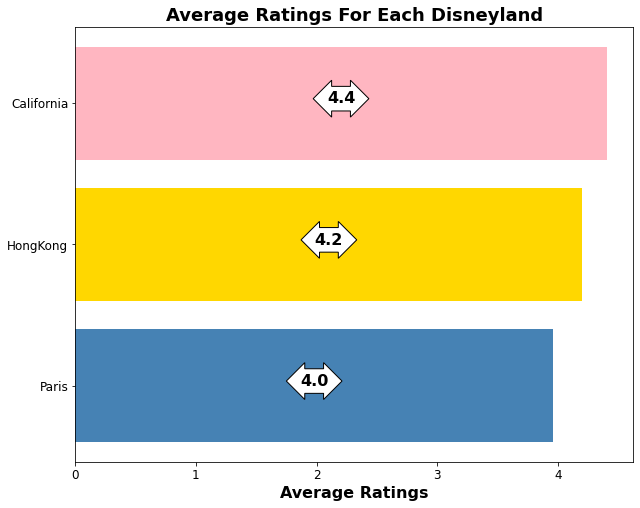

In [10]:
# average ratings for each Disneyland
rating_mean = df \
    .groupby('Branch') \
    .agg({'Rating': 'mean'}) \
    .unstack()['Rating'] \
    .sort_values(ascending=True)
color_list = ['steelblue', 'gold', 'lightpink']
plt.figure(figsize=(10, 8))
# bar plot
plt.barh(
    [b.split("_")[1] for b in rating_mean.index], 
    rating_mean.values, 
    color=color_list)
# for each average rating
for val, p in zip(rating_mean.values, [b.split("_")[1] for b in rating_mean.index]):
    # plot text
    plt.text(
        val/2, p, round(val, 1),
        color='black',
        ha='center',
        fontweight='demi',
        fontsize=16,
        bbox=dict(
            boxstyle='darrow',
            facecolor='white'))
plt.title('Average Ratings For Each Disneyland', fontsize=18, fontweight='bold')
plt.xlabel('Average Ratings', fontsize=16, fontweight='bold')
plt.xticks(np.arange(0, 5))
plt.tick_params(axis='x', labelsize=12, labelcolor='black')
plt.tick_params(axis='y', labelsize=12, labelcolor='black')
plt.show()

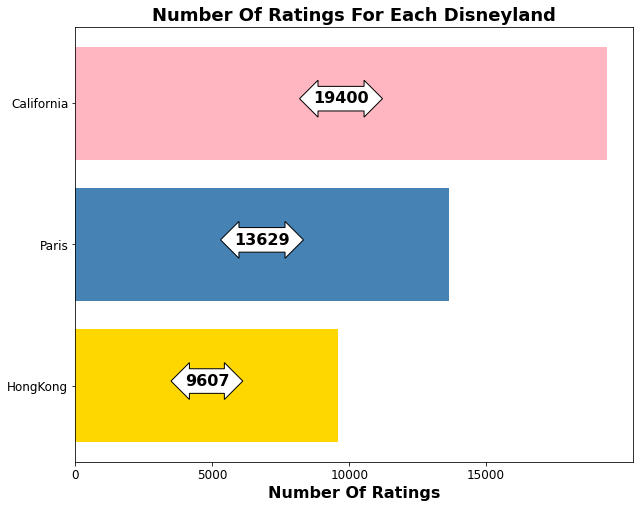

In [11]:
# amount of ratings for each Disneyland
rating_count = df \
    .groupby('Branch') \
    .agg({'Rating': 'count'}) \
    .unstack()['Rating'] \
    .sort_values(ascending=True)
color_list = ['gold', 'steelblue', 'lightpink']
plt.figure(figsize=(10, 8))
# bar plot
plt.barh(
    [b.split("_")[1] for b in rating_count.index], 
    rating_count.values, 
    color=color_list)
# for each number of ratings for each Disneyland
for val, p in zip(rating_count.values, [b.split("_")[1] for b in rating_count.index]):
    # plot text
    plt.text(
        val/2, p, round(val, 1),
        color='black',
        ha='center',
        fontweight='demi',
        fontsize=16,
        bbox=dict(
            boxstyle='darrow',
            facecolor='white'))
plt.title('Number Of Ratings For Each Disneyland', fontsize=18, fontweight='bold')
plt.xlabel('Number Of Ratings', fontsize=16, fontweight='bold')
plt.xticks(np.arange(0, 20000, 5000))
plt.tick_params(axis='x', labelsize=12, labelcolor='black')
plt.tick_params(axis='y', labelsize=12, labelcolor='black')
plt.show()

## (3) Reviewer Location Analyses

Reviewer_Location
United States     14542
United Kingdom     9751
Australia          4676
Canada             2234
dtype: int64


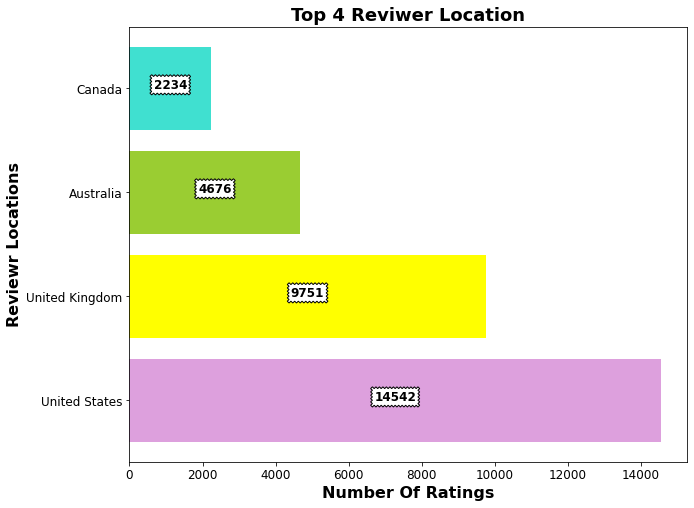

In [14]:
# top 4 reviewer locations
rating_location = df \
    .groupby('Reviewer_Location') \
    .agg({'Rating': 'count'}) \
    .unstack()['Rating'] \
    .sort_values(ascending=False) \
    .head(4)
print(rating_location)
color_list = ['plum', 'yellow', 'yellowgreen', 'turquoise']
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(10, 8))
    # bar plot
    plt.barh(
        [b for b in rating_location.index], 
        rating_location.values, 
    color=color_list)
    # number of reviews for each location
    for r, val in zip(rating_location.index, rating_location.values):
        # plot text
        plt.text(
            val/2, r, 
            round(val, 1), 
            ha='center',
            color='black',
            fontweight='demi',
            fontsize=12,
            bbox=dict(
                facecolor='white',
                edgecolor='black',
                boxstyle="sawtooth"))
    plt.title('Top 4 Reviwer Location', fontsize=18, fontweight='bold')
    plt.xlabel('Number Of Ratings', fontsize=16, fontweight='bold')
    plt.ylabel('Reviewr Locations', fontsize=16, fontweight='bold')
    plt.tick_params(axis='x', labelsize=12, labelcolor='black')
    plt.tick_params(axis='y', labelsize=12, labelcolor='black')

Reviewer_Location
United States     4.318663
Australia         4.312019
Canada            4.299015
United Kingdom    4.051174
dtype: float64


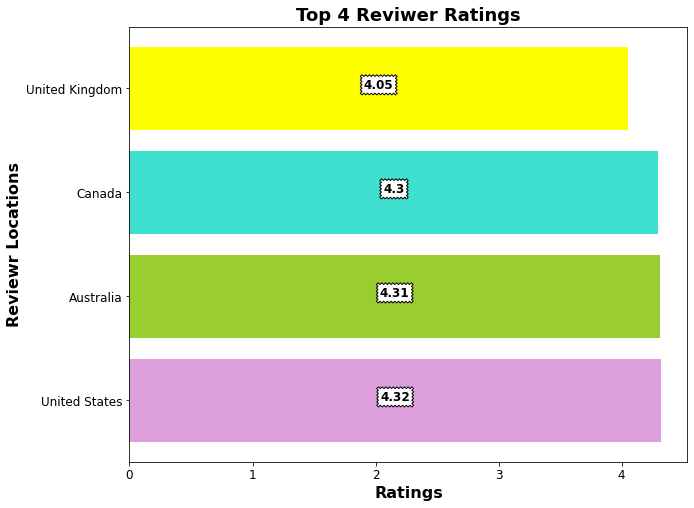

In [15]:
# average ratings from top 4 locations for all Disneylands
rating_location = df.loc[df['Reviewer_Location'].isin(["Canada", "Australia", "United Kingdom", "United States"])] \
    .groupby('Reviewer_Location') \
    .agg({'Rating': 'mean'}) \
    .unstack()['Rating'] \
    .sort_values(ascending=False) \
    .head(4)
print(rating_location)
color_list = ['plum', 'yellowgreen','turquoise', 'yellow']
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(10, 8))
    # bar plot
    plt.barh(
        [b for b in rating_location.index], 
        rating_location.values,
        color=color_list)
    # average rating from each location
    for r, val in zip(rating_location.index, rating_location.values):
        # text plot
        plt.text(
            val/2, r, 
            round(val, 2), 
            ha='center',
            color='black',
            fontweight='demi',
            fontsize=12,
            bbox=dict(
                facecolor='white',
                edgecolor='black',
                boxstyle="sawtooth"))
    plt.title('Top 4 Reviwer Ratings', fontsize=18, fontweight='bold')
    plt.xlabel('Ratings', fontsize=16, fontweight='bold')
    plt.ylabel('Reviewr Locations', fontsize=16, fontweight='bold')
    plt.xticks(np.arange(0, 5))
    plt.xticks(np.arange(0, 5))
    plt.tick_params(axis='x', labelsize=12, labelcolor='black')
    plt.tick_params(axis='y', labelsize=12, labelcolor='black')

# 2. US Visitor Analyses

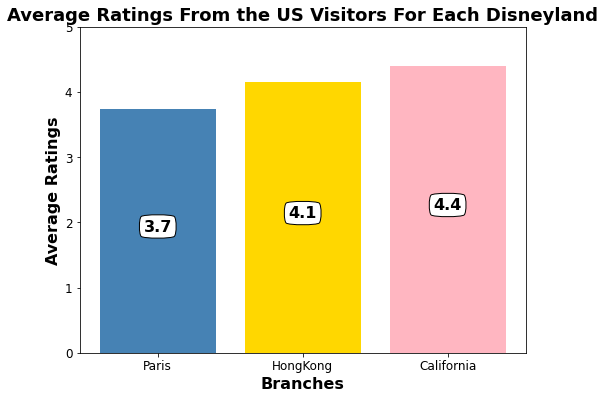

In [16]:
# Average Ratings From the US Visitors For Each Disneyland
rating_mean = df.loc[df['Reviewer_Location'] == "United States"].copy() \
    .groupby('Branch') \
    .agg({'Rating': 'mean'}) \
    .unstack()['Rating'] \
    .sort_values(ascending=True)
color_list = ['steelblue', 'gold', 'lightpink']
plt.figure(figsize=(8, 6))
# bar plot
plt.bar(
    [b.split("_")[1] for b in rating_mean.index], 
    rating_mean.values, 
    color=color_list)
# mean rating for each branch
for val, p in zip(rating_mean.values, [b.split("_")[1] for b in rating_mean.index]):
    # text plot
    plt.text(
        p, val/2, round(val, 1),
        color='black',
        ha='center',
        fontweight='demi',
        fontsize=16,
        bbox=dict(
            boxstyle='round4',
            facecolor='white'))
plt.title('Average Ratings From the US Visitors For Each Disneyland', fontsize=18, fontweight='bold')
plt.xlabel('Branches', fontsize=16, fontweight='bold')
plt.ylabel('Average Ratings', fontsize=16, fontweight='bold')
plt.yticks(np.arange(0, 6))
plt.tick_params(axis='x', labelsize=12, labelcolor='black')
plt.tick_params(axis='y', labelsize=12, labelcolor='black')
plt.show()

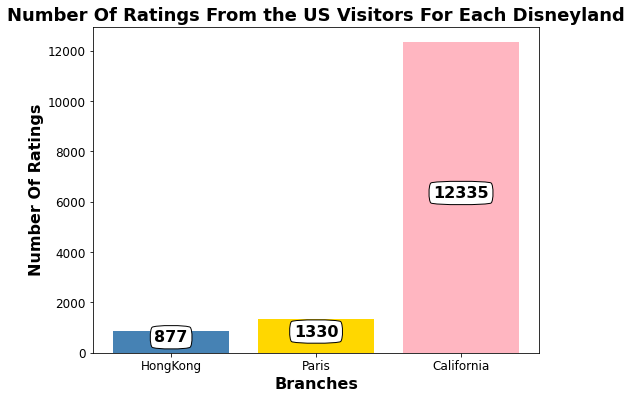

In [17]:
# Number Of Ratings From the US Visitors For Each Disneyland
rating_mean = df.loc[df['Reviewer_Location'] == "United States"].copy() \
    .groupby('Branch') \
    .agg({'Rating': 'count'}) \
    .unstack()['Rating'] \
    .sort_values(ascending=True)
color_list = ['steelblue', 'gold', 'lightpink']
plt.figure(figsize=(8, 6))
# bar plot
plt.bar(
    [b.split("_")[1] for b in rating_mean.index], 
    rating_mean.values, 
    color=color_list)
# for every mean rating
for val, p in zip(rating_mean.values, [b.split("_")[1] for b in rating_mean.index]):
    # text plot
    plt.text(
        p, val/2, round(val, 1),
        color='black',
        ha='center',
        fontweight='demi',
        fontsize=16,
        bbox=dict(
            boxstyle='round4',
            facecolor='white'))
plt.title('Number Of Ratings From the US Visitors For Each Disneyland', fontsize=18, fontweight='bold')
plt.xlabel('Branches', fontsize=16, fontweight='bold')
plt.ylabel('Number Of Ratings', fontsize=16, fontweight='bold')
plt.tick_params(axis='x', labelsize=12, labelcolor='black')
plt.tick_params(axis='y', labelsize=12, labelcolor='black')
plt.show()

/var/folders/jr/kc3prx_95yx5qzv4qynb3f680000gn/T/ipykernel_9183/2209135156.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  quarter_df = df_dropna.loc[df['Reviewer_Location'] == "United States"].copy() \
/var/folders/jr/kc3prx_95yx5qzv4qynb3f680000gn/T/ipykernel_9183/2209135156.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


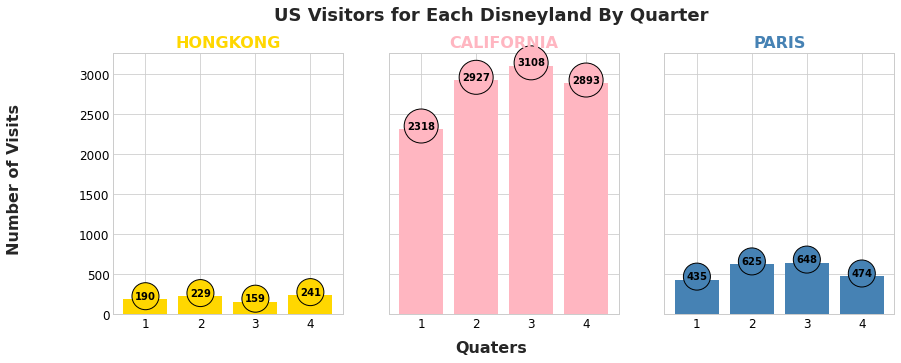

In [19]:
color_list = ['gold', 'lightpink', 'steelblue']
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(1, 3, figsize=(14, 5), sharey=True)
    plt.subplots_adjust(top=0.85)
    # for each branch and color
    for i, (b, c) in enumerate(zip(df_dropna['Branch'].unique(), color_list)):
        # select US location and count reviews by quarters
        quarter_df = df_dropna.loc[df['Reviewer_Location'] == "United States"].copy() \
            [(df_dropna['Branch'] == b)]['Quarter'] \
            .value_counts()
        # bar plot
        ax[i].bar(quarter_df.index, quarter_df.values, color=c, label=b)
        # plot text
        for q, val in zip(quarter_df.index, quarter_df.values):
            ax[i].text(
                q, val, val,
                ha='center', 
                color='black',
                fontsize=10,
                fontweight='demi',
                bbox=dict(
                    facecolor=c,
                    edgecolor='black',
                    boxstyle="circle"))
        ax[i].set_title(b.split("_")[1].upper(), color=c, fontweight='demi', fontsize=16)
        ax[i].tick_params(axis='x', labelsize=12, labelcolor='black')
        ax[i].tick_params(axis='y', labelsize=12, labelcolor='black')
    fig.suptitle('US Visitors for Each Disneyland By Quarter', fontsize=18, fontweight='bold')
    fig.supxlabel('Quaters', fontsize=16, fontweight='demi')
    fig.supylabel('Number of Visits', fontsize=16, fontweight='demi')
    fig.show()

# 3. Most Frequent Words

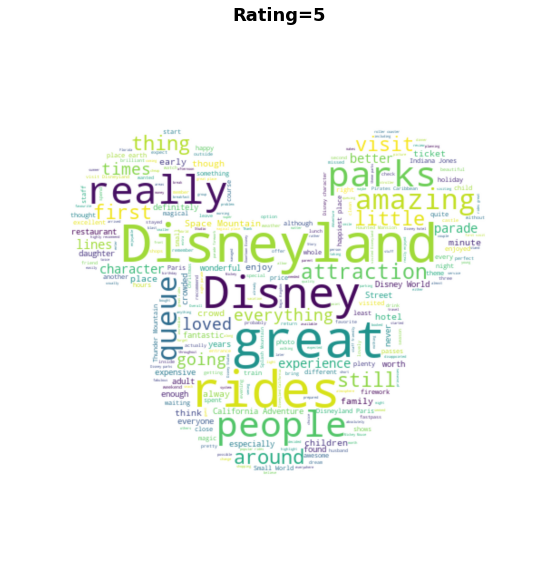

In [21]:
# insert logo mask
mask = np.array(Image.open("logo.jpeg"))
plt.figure(figsize = (10,10))
# plot for rating = 5
Wc = WordCloud(
    max_words = 800,
    mask = mask,
    width = 800,
    height = 800,
    min_word_length=5,
    background_color='white') \
        .generate(" ".join(df[df['Rating'] == 5] \
        .Review_Text))
plt.axis("off")
plt.title('Rating=5', fontsize=18, fontweight='bold')
# use gaussian algorithm
plt.imshow(Wc , interpolation = 'gaussian')

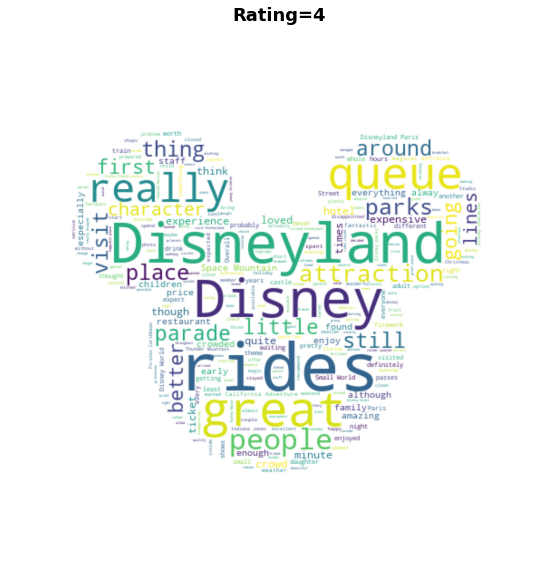

In [16]:
plt.figure(figsize = (10,10))
Wc = WordCloud(
    max_words = 800,
    mask = mask,
    width = 800,
    height = 800,
    min_word_length=5,
    background_color='white') \
        .generate(" ".join(df[df['Rating'] == 4] \
        .Review_Text))
plt.axis("off")
plt.title('Rating=4', fontsize=18, fontweight='bold')
plt.imshow(Wc , interpolation = 'gaussian')

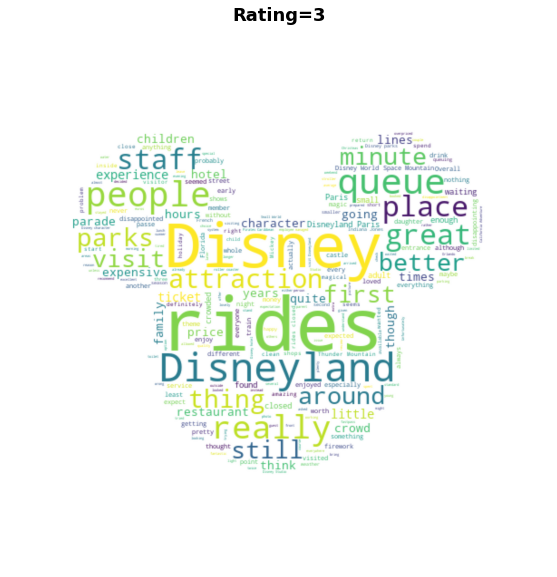

In [17]:
plt.figure(figsize = (10, 10))
Wc = WordCloud(
    max_words = 800,
    mask = mask,
    width = 800,
    height = 800,
    min_word_length=5,
    background_color='white') \
        .generate(" ".join(df[df['Rating'] == 3] \
        .Review_Text))
plt.axis("off")
plt.title('Rating=3', fontsize=18, fontweight='bold')
plt.imshow(Wc , interpolation = 'gaussian')

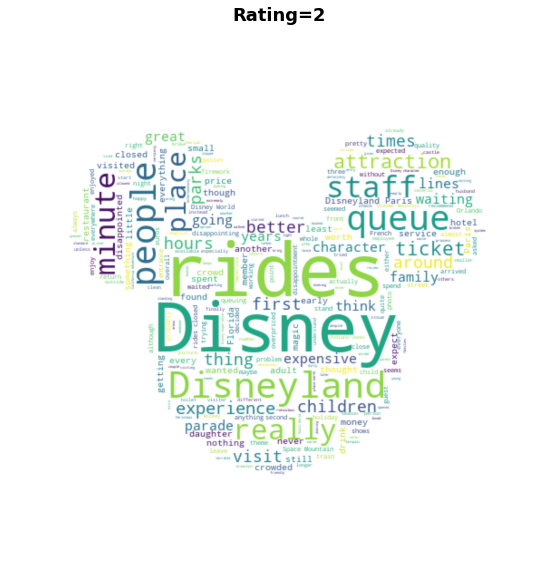

In [18]:
plt.figure(figsize = (10, 10))
Wc = WordCloud(
    max_words = 800,
    mask = mask,
    width = 800,
    height = 800,
    min_word_length=5,
    background_color='white') \
        .generate(" ".join(df[df['Rating'] == 2] \
        .Review_Text))
plt.axis("off")
plt.title('Rating=2', fontsize=18, fontweight='bold')
plt.imshow(Wc , interpolation = 'gaussian')

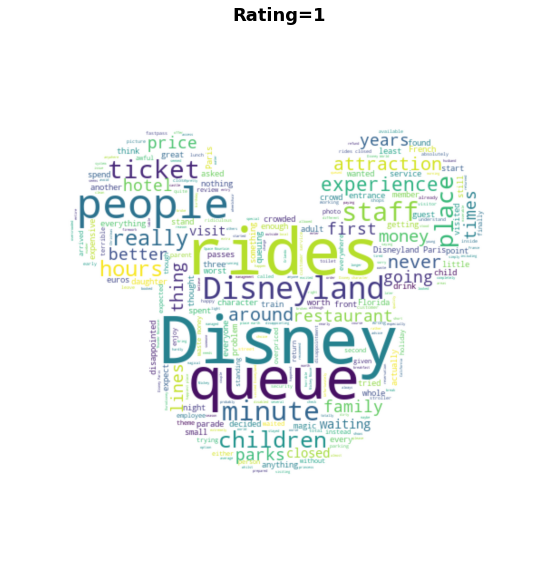

In [19]:
plt.figure(figsize = (10, 10))
Wc = WordCloud(
    max_words = 800,
    mask = mask,
    width = 800,
    height = 800,
    min_word_length=5,
    background_color='white') \
        .generate(" ".join(df[df['Rating'] == 1] \
        .Review_Text))
plt.axis("off")
plt.title('Rating=1', fontsize=18, fontweight='bold')
plt.imshow(Wc , interpolation = 'gaussian')